In [50]:
import cv2 as cv
import numpy as np
import torch
import pycuda.driver as cuda
import yolov5
import matplotlib.pyplot as plt

In [2]:
cuda.init()
# torch.cuda.current_device()
# 0
cuda.Device(0).name() # '0' is the id of your GPU

'NVIDIA GeForce RTX 3070 Laptop GPU'

In [3]:
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION', )
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
__pyTorch VERSION: 1.13.1+cu116
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:15:10_Pacific_Standard_Time_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0
__CUDNN VERSION: 8302
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [4]:
torch.cuda.device_count()

1

## Load Pre trained model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\gabri/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-20 Python-3.9.13 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

In [7]:
# cam = cv.VideoCapture(0)
cam = cv.VideoCapture("traffic_small.mp4")
while True:
    check, frame = cam.read()
    
    results = model(frame)
    cv.imshow('video', np.squeeze(results.render()))

    key = cv.waitKey(1)
    if key == 27:
        break

cam.release()
cv.destroyAllWindows()

## Train from scratch

In [9]:
import uuid
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['valentao', 'spock']
num_images = 20

In [25]:
cam = cv.VideoCapture(0)
while True:
    check, frame = cam.read()
    
    results = model(frame)
    cv.imshow('video', np.squeeze(results.render()))

    key = cv.waitKey(1)
    if key == 27:
        break

cam.release()
cv.destroyAllWindows()

In [26]:
IMAGES_PATH

'data\\images'

In [34]:
labels

['valentao', 'spock']

In [35]:
cam = cv.VideoCapture(0)

for label in labels[1:]:
    print(f'Collecting images for {label}')
    time.sleep(1)
    for img_number in range(num_images):
        print(f'Collecting images for {label}, image number {img_number}')
        check, frame = cam.read()
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv.imwrite(imgname, frame)
        cv.imshow('Image Collection', frame)
        time.sleep(2)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
cam.release()
cv.destroyAllWindows()


In [23]:
cv.destroyAllWindows()

In [24]:
for label in labels:
    print(f'Collecting images for {label}')

    for img_number in range(num_images):
        print(f'Collecting images for {label}, image number {img_number}')
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()))
        print(imgname)
        

data\images\valentao.5fc3a5fc-b1e2-11ed-ab0a-b44506b19f12
data\images\valentao.5fc3a5fd-b1e2-11ed-80dd-b44506b19f12
data\images\valentao.5fc3a5fe-b1e2-11ed-bf58-b44506b19f12
data\images\valentao.5fc3a5ff-b1e2-11ed-88bf-b44506b19f12
data\images\valentao.5fc3a600-b1e2-11ed-a575-b44506b19f12
data\images\valentao.5fc3a601-b1e2-11ed-8ed2-b44506b19f12
data\images\valentao.5fc3a602-b1e2-11ed-9529-b44506b19f12
data\images\valentao.5fc3a603-b1e2-11ed-a890-b44506b19f12
data\images\valentao.5fc3a604-b1e2-11ed-91c6-b44506b19f12
data\images\valentao.5fc3a605-b1e2-11ed-be6f-b44506b19f12
data\images\valentao.5fc3a606-b1e2-11ed-a282-b44506b19f12
data\images\valentao.5fc3a607-b1e2-11ed-b438-b44506b19f12
data\images\valentao.5fc3a608-b1e2-11ed-a1f6-b44506b19f12
data\images\valentao.5fc3a609-b1e2-11ed-8629-b44506b19f12
data\images\valentao.5fc3a60a-b1e2-11ed-9314-b44506b19f12
data\images\valentao.5fc3a60b-b1e2-11ed-9925-b44506b19f12
data\images\valentao.5fc3a60c-b1e2-11ed-9b43-b44506b19f12
data\images\va

In [15]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [20]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [36]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 400 --data dataset.yml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-108-g4db6757 Python-3.9.13 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

## Load custom model

In [38]:
model_loaded = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\gabri/.cache\torch\hub\master.zip
YOLOv5  2023-2-21 Python-3.9.13 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [47]:
model_loaded.conf = 0.2  # NMS confidence threshold
model_loaded.iou = 0.6  # NMS IoU threshold
model_loaded.agnostic = False  # NMS class-agnostic
model_loaded.multi_label = False  # NMS multiple labels per box
model_loaded.max_det = 1000  # maximum number of detections per image

In [48]:
cam = cv.VideoCapture(0)
while True:
    check, frame = cam.read()
    
    results = model_loaded(frame)
    cv.imshow('video', np.squeeze(results.render()))

    key = cv.waitKey(1)
    if key == 27:
        example = np.squeeze(results.render())
        break

cam.release()
cv.destroyAllWindows()

## Demonstrate

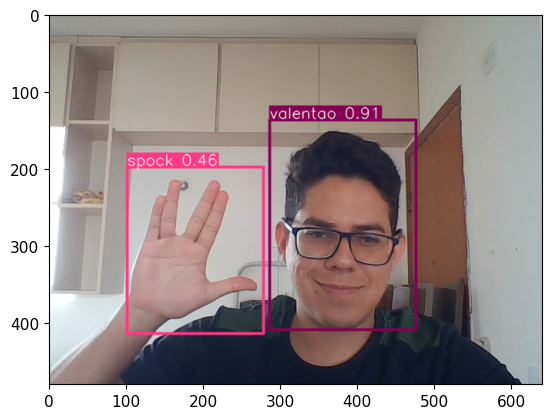

In [57]:
%matplotlib inline 
plt.imshow(cv.cvtColor(example, cv.COLOR_BGR2RGB))
plt.show()